In [24]:
from sklearn.datasets import fetch_20newsgroups
import sklearn
import pandas as pd
import re
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans,k_means
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mutual_info_score
from nltk.stem import WordNetLemmatizer
from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


### Task 1: Read the dataset and report the basic statistics of the dataset
import data from sklearn.datasets and selecte pre-defined categories:

In [2]:
categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
true_labels = dataset.target
dataset = pd.Series(dataset['data'])
len(dataset)

2852

In [3]:
true_labels

array([2, 0, 2, ..., 4, 1, 2])

### Task 2: Data cleaning.

In [4]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    - lemmatizing words
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """
    lemmatizer = WordNetLemmatizer()
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        tokens = [lemmatizer.lemmatize(w) for w in tokens]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#clean the data
dataset = dataset.map(lambda x:preprocess_text(x,True))

In [6]:
dataset

0       moved borland c visual c today tried compile c...
1       nice cop bill sure right idea refer would mind...
2       attempting transfer file home computer running...
3       murdering would moral significance since would...
4       could give much testimonial experience scout b...
                              ...                        
2847    p atheism incidental question god trivial p p ...
2848    still leaf door totally open khomeini hussein ...
2849    markus good season modo swedish elite league s...
2850         opps typed phone number wrong correct number
2851    sorry followup get email address trying decide...
Length: 2852, dtype: object

### Data exploration and visualization

In [7]:
word_freq = pd.Series(" ".join(dataset).split()).value_counts()

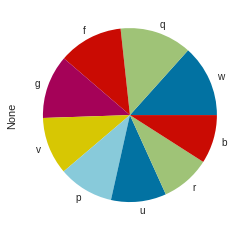

In [8]:
#most frequented words
word_freq[1:10].plot.pie()

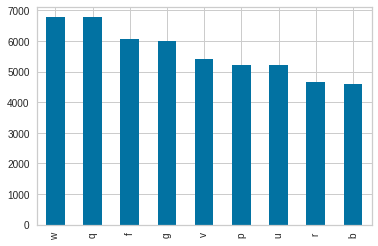

In [9]:
word_freq[1:10].plot.bar()

In [10]:
#least frequented words
word_freq[-10:]

danke        1
mcv          1
ihre         1
scyt         1
fineman      1
iua          1
overcomes    1
opo          1
uov          1
opps         1
dtype: int64

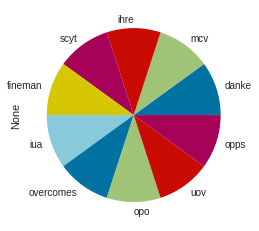

In [11]:
word_freq[-10:].plot.pie()

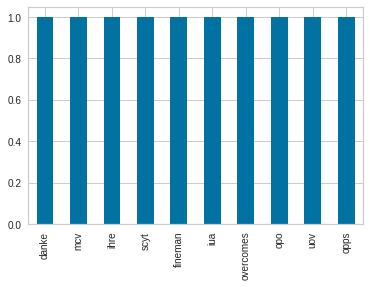

In [12]:
word_freq[-10:].plot.bar()

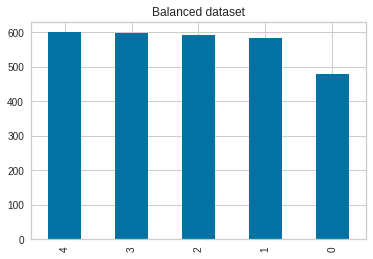

In [13]:
#labels count
true_labels = pd.Series(true_labels)
true_labels.value_counts().plot(kind='bar',title='Balanced dataset')

### Task 3: create vector representation of each document using TF-IDF encoding

In [14]:
pipe_tfIDF = Pipeline([("tfidf", TfidfVectorizer(analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 3)))])
pipe_tfIDF.fit(dataset)
dataset_vec = pipe_tfIDF.transform(dataset)
dataset_vec = dataset_vec.toarray()

### Task 4: Apply Kmeans and Kmeans++ on the above extracted document vectors. Brifely describe how would you select the value of k. 

By implementing the **“elbow”** will help us to select the optimal number of clusters by fitting the model with a range of values for **K**. If the line chart resembles an arm, then the **“elbow” (the point of inflection on the curve)** is a good indication that the underlying model fits best at that point.

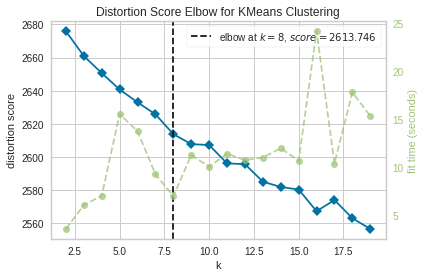

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(dataset_vec)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Apply best K for KMeans and K_means

In [18]:
#KMeans on original data
clustring_0 = KMeans(n_clusters=8, random_state=0).fit(dataset_vec)

In [19]:
#k-means++ on origianl data
clustring_1 = k_means(X = dataset_vec, n_clusters = 8, init='k-means++')
#random k-means on original data
clustring_2 = k_means(X = dataset_vec, n_clusters = 8, init='random')

In [20]:
clustring_1

(array([[-6.50521303e-19, -3.90312782e-18,  2.55361519e-05, ...,
          6.77626358e-20,  1.51788304e-18,  6.77626358e-20],
        [ 1.62013221e-04,  2.00418930e-03,  1.00929972e-03, ...,
          1.11394358e-04,  1.32802559e-03,  1.98853410e-04],
        [ 2.16840434e-19,  0.00000000e+00,  2.35832019e-03, ...,
         -1.35525272e-20,  0.00000000e+00,  1.35525272e-20],
        ...,
        [-3.25260652e-19, -1.95156391e-18,  0.00000000e+00, ...,
          2.03287907e-20,  1.30104261e-18, -5.42101086e-20],
        [ 2.49815319e-03,  3.29626194e-03,  1.87941532e-03, ...,
         -1.35525272e-19,  3.08790937e-03, -2.03287907e-19],
        [ 6.93369142e-05, -2.16840434e-19,  6.66782540e-05, ...,
          3.46713817e-04,  0.00000000e+00,  7.19627363e-05]]),
 array([3, 1, 0, ..., 6, 1, 3], dtype=int32),
 2616.474725399996)

### Task 5: perform tricks on the above two approaches by considering the high-dimensional nature of the dataset, you can consider PCA (from sklearn.decomposition import PCA), or other methods.

In [21]:
reduce_data = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
reduced_data = reduce_data.fit_transform(dataset_vec)
reduced_data

array([[ 0.09452686,  0.08033693,  0.00696315,  0.00541783, -0.01088549],
       [ 0.10310656, -0.01347229,  0.04266704,  0.00289697, -0.02892662],
       [ 0.15037008,  0.20967095, -0.09297389,  0.21324747, -0.01913102],
       ...,
       [ 0.19423115, -0.13649273, -0.08176658,  0.01247254, -0.01659327],
       [ 0.06282109,  0.00139355,  0.01028318, -0.0006119 , -0.01500375],
       [ 0.15059158,  0.0510989 ,  0.03675288, -0.05138408, -0.06650197]])

Choose best K for reduced data

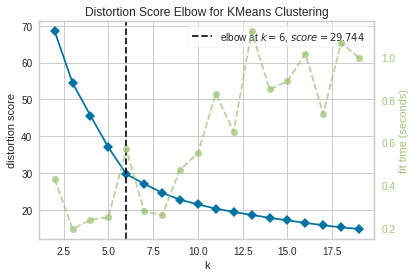

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(reduced_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [27]:
#KMeans on reduced data
clustring_3 = KMeans(n_clusters=6, random_state=0).fit(reduced_data)

In [28]:
#k-means++ on reduced data
clustring_4 = k_means(X = reduced_data, n_clusters = 6, init='k-means++')
#random k-means on reduced data
clustring_5 = k_means(X = reduced_data, n_clusters = 6, init='random')

### Task 6: compare the performance of the above four approaches on the given dataset using mutual information based scores:

In [29]:
mutual_info_score(true_labels,clustring_0.labels_)

0.6414124553739377

In [30]:
mutual_info_score(true_labels,clustring_1[-2])

0.6041518187595353

In [31]:
clustring_2[-2]
mutual_info_score(true_labels,clustring_2[-2])

0.5811735623961574

In [32]:
mutual_info_score(true_labels,clustring_3.labels_)

0.5291230516235372

In [33]:
mutual_info_score(true_labels,clustring_4[-2])

0.5270526509812722

In [34]:
mutual_info_score(true_labels,clustring_5[-2])

0.5287333762758437

### From above results we can see that the best mutual score is clustring_0 labels and it's using KMeans with 8 clusters, and the worset score was using k-means random with 6 clusters, and in general, we shouldn't reduced the data if we want to get high results since the clustring original data give us better results.